In [102]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import seaborn as sns
from sympy import *
import math


import warnings

# Configuration
warnings.simplefilter('ignore')
pd.set_option('max_column', None)
sns.set_style("darkgrid")
colors = sns.color_palette('Set2')


def nominal_interest_rate(e, m):
    n = m*((1 + e)**(1/m) - 1)
    return n

def nominal_interest_rate_continuous(r):
    n = np.log(r + 1)
    return n
    

def present_value(FV, r, n):
    PV = FV/(1+r/100)**n
    return PV


'''
FV = Future Value
r = Interest Rate
n = Number of Periods
'''

def present_value_annuity_due(p, r, n):
#     C + C*[1-(1+i)^-(n-1)]/i]
    pv_a = p + p*(1-(1+r)**((-1)*(n-1)))/r
    return pv_a

'''
C= Cash Flow per period
r = interest rate per period
n =number of period
'''

def annuities_perpetual(p,r,n):
    A = (r*(1+r)**n*(p))/((1+r)**n -1)
    return A 

def pv_perpetual(A, r, n):
    p = A/r*(1-(1/(1+r)**n))
    return p

def irr(r, li):
    irr = np.irr(r, li)
    return irr



# Bond price and yield to maturity
def bond_price(F, lam, m, n, C):
    p = (F/((1+lam/m)**n)) + C/lam*(1-(1/(1+(lam/m))**n))
    return n


# face_value = 10000
# market_price = 9000
# n = 4
# coupon_payment = 0.05 * 10000
def ytm(face_value, market_price, n, coupon_payment):
    ytm = ((coupon_payment + (face_value-market_price)/ n)) / ((face_value + market_price)/2)
    return ("The YTM for this bond is: " + str(ytm*100) + "%")

'''
n: period
C: yearly coupon payment
F: face value
m: # of coupon payments(C) per year
P: current price of the bond
lam(lambda): yield of maturity
'''
def Macaulay_duration(c, y, m, n):
    D = ((1+y)/m*y) - (1+y+n*(c-y)/m*c*((1+y)**n-1)+ m*y)
    return D

### Q
Under monthly compounding, what nominal annual rate of interest  is equivalent to an effective annual rate of 10% ?
Please express your answer in decimal form (not percentage) and round your answer to four decimal places.

In [34]:
'''
given: monthly comp, r = .1, n= 12
Use:  0.10 = ((1+Nominal Interest/12)^12) - 1
want: nominal annual rate


n = m × [ ( 1 + e)1/m - 1 ]

Where:
e = effective rate
m = number of compounding periods

'''



# nominal_I_mc = (((0.10 + 1)**(1/12)) -1) * 12

nominal_interest_rate(.1, 12)

0.09568968514684517

### Q

Under continuous annual compounding, what nominal annual rate of interest  is equivalent to an effective annual rate of 10% ?

Please express your answer in decimal form (not percentage) and round your answer to four decimal places.

In [35]:
nominal_interest_rate_continuous(.1)

0.09531017980432493

### Q

A major lottery advertises that it pays the winner $ 10 million. 
However, this prize money is paid at the rate of $250,000 each year (with the first payment being immediate) for a total of 40 payments.  

What is the present value of this prize at 5% interest?

Please round your answer to the nearest integer dollar.

In [36]:
'''
Present Value Of An Annuity Due
C + C*[1-(1+i)^-(n-1)]/i]

Where
C= Cash Flow per period
i = interest rate per period
n=number of period
'''

present_value_annuity_due(250000, .05, 40)

4504260.167923542

### Q

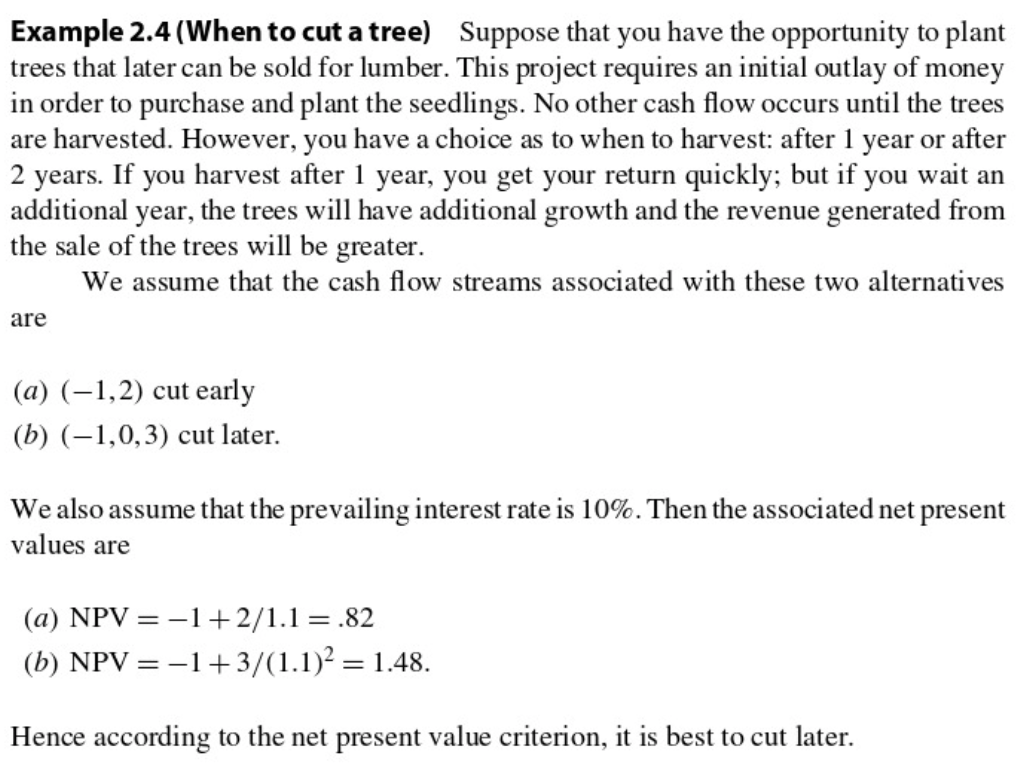

Now suppose you learn that a third option is possible: you may delay cutting the trees for another 2 years, thus harvesting after 4 years.  You are told that, from a present value perspective, it is not worthwhile to do so.  If this is true, the revenue obtained when cutting trees after 4 years must be less than x. 

What is x?  Please round your numerical answer to 1 decimal place.

In [51]:
'''
The best option has a PV of 1.48 (i.e. PV of option 2)
Now let the revenue in case of option 3 be “x”.

Thus -1 + x/1.1^4 <= 1.48

Or -1 + x/1.4641 <= 1.48

Or x/1.4641 <= 2.48

Or x <= 3.6

'''

x = 2.48 * 1.1**4
x

3.630968000000001

### Q

You are considering the purchase of a new home. 
It is in every way perfect for you and in excellent condition, except for the roof. The roof has only **5 years of life remaining.**   

A new roof would last **20 years, but would cost $40,000.** The house is expected to last forever. Assuming that costs will remain constant and that the interest rate is **5%**

what value would you assign to the existing roof?
Please round your numerical answer to the nearest integer dollar.

In [88]:
'''
Present value of annuity = annuity * ( 1- 1/( 1+ rate ) ^time ) / rate
Present value of annuity for 5 years = annuity * ( 1- 1/(1+rate)^time )/rate
'''
A = annuities_perpetual(40000, 0.05, 20)
pv_perpetual(A, 0.05, 5)

13896.336369326305

You purchase a commercial office building in Irvine for $800,000  and  sell it 10 years later for $1,000,000.**

At the end of each year that you own the building, you receive $24,000 in rental income:  this is a total of 10 cash flows of $24,000 each.

What is the internal rate of return?

Please express your answer in percentage, not decimal, form.  Please round your numerical answer to 2 decimal places.

In [107]:
# a = ones(1,10)*24000


TypeError: _irr_dispatcher() takes 1 positional argument but 2 were given

In [109]:
np.irr([1,1,1,1,1,1,1,1,1,1])

nan